In [2]:
root_dir = "C:/Users/Public/Documents/Konrad/Mlsp/Projet__01_MLSP_PIV_Measurements"

In [3]:
from PIL import Image, ImageDraw

def create_colored_image(width, height, colors):
    """Creates an image with evenly separated colored columns.
  
    Args:
      width: Width of the image in pixels.
      height: Height of the image in pixels.
      colors: A list of 4 RGB color tuples.
  
    Returns:
      A PIL Image object.
    """

    img = Image.new('RGB', (width, height), (255, 255, 255))  # White background
    draw = ImageDraw.Draw(img)

    # Calculate the width of each column
    column_width = width // len(colors)

    for i, color in enumerate(colors):
        x1 = i * column_width
        x2 = (i + 1) * column_width
        draw.rectangle([(x1, 0), (x2, height)], fill=color)

    return img

# Example usage:
width = 400
height = 200
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]  # Red, Green, Blue, Yellow

img = create_colored_image(width, height, colors)
img.save(root_dir + '/colored_image.png')

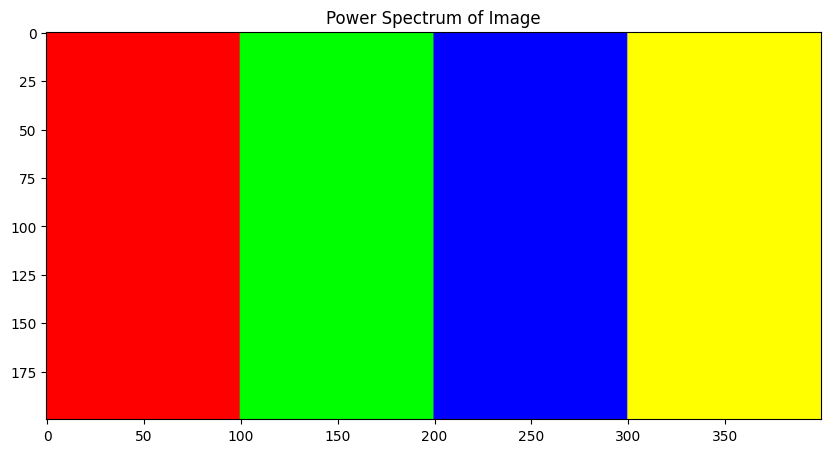

<Figure size 640x480 with 0 Axes>

In [5]:
# Plot img

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title("Power Spectrum of Image")
plt.imshow(img, cmap='gray')
plt.show()
plt.savefig(root_dir + '/colored_image.png')

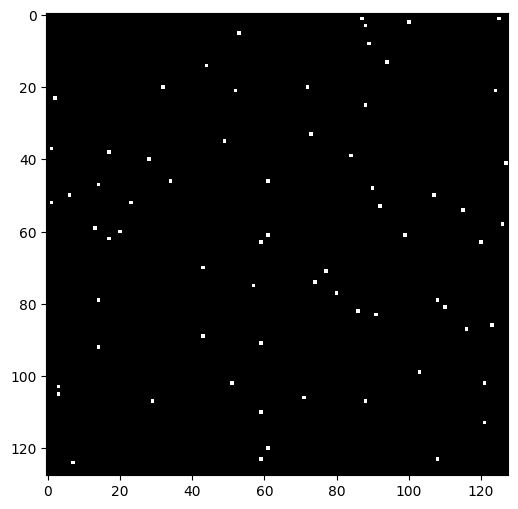

In [6]:
import numpy as np

# Generate a fake particle image with noise
np.random.seed(42)
image_size = (128, 128)

# Create particles by placing bright spots in random locations
image = np.zeros(image_size)
num_particles = 68
for _ in range(num_particles):
    x, y = np.random.randint(0, image_size[0]), np.random.randint(0, image_size[1])
    image[x, y] = 255

plt.figure(figsize=(10, 6))
plt.imshow(image, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.018126118470097215..0.9085111878594156].


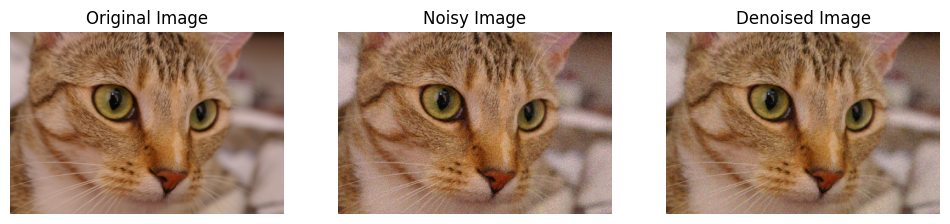

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.restoration import denoise_wavelet

# Load the image
image = img_as_float(data.chelsea())

# Add noise
noisy_image = random_noise(image, var=0.05**2)

# Denoise the image using wavelet denoising
denoised_image = denoise_wavelet(noisy_image, channel_axis=None)

# Display the images
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

ax[0].imshow(image, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(noisy_image, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy Image')

ax[2].imshow(denoised_image, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Denoised Image')

plt.show()